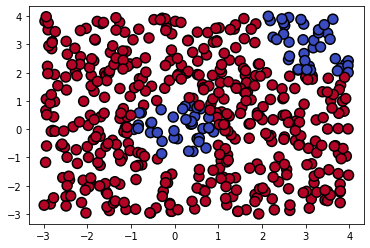

In [1]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_blobs, make_circles
import matplotlib.pyplot as plt
import numpy as np


%matplotlib inline

RANDOM_SEED = 139

def get_labels(data):
    labels = []
    for idx, item in enumerate(data):
        if item[0]**2 + item[1]**2 < 1:
            labels.append(0)
        elif item[0] > 2 and item[1] > 2:
            labels.append(0)
        else:
            labels.append(1)
    return np.array(labels)

N = 500
train_data = 7 * np.random.random_sample((N,2)) - np.array([3,3])

train_labels = get_labels(train_data)

# Let’s write an auxiliary function that will return grid for further visualization.
def get_grid(data):
    x_min, x_max = data[:, 0].min() - 1, data[:, 0].max() + 1
    y_min, y_max = data[:, 1].min() - 1, data[:, 1].max() + 1
    return np.meshgrid(np.arange(x_min, x_max, 0.01), np.arange(y_min, y_max, 0.01))

shallow_rf = RandomForestClassifier(n_estimators=5, max_depth=3, n_jobs=-1, 
                                    random_state=RANDOM_SEED)
deep_rf = RandomForestClassifier(n_estimators=5, max_depth=100, n_jobs=-1, 
                                 random_state=RANDOM_SEED)

# training the tree
shallow_rf.fit(train_data, train_labels)
deep_rf.fit(train_data, train_labels)

# some code to depict separating surface
xx, yy = get_grid(train_data)
predicted_shallow = shallow_rf.predict(np.c_[xx.ravel(), 
                                   yy.ravel()]).reshape(xx.shape)
predicted_deep = deep_rf.predict(np.c_[xx.ravel(), 
                                   yy.ravel()]).reshape(xx.shape)

plt.scatter(train_data[:, 0], train_data[:, 1], c=train_labels, s=100, 
            cmap='coolwarm', edgecolors='black', linewidth=1.5);

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  This is separate from the ipykernel package so we can avoid doing imports until
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  


Text(0.5, 1.0, 'Deep Random Forest')

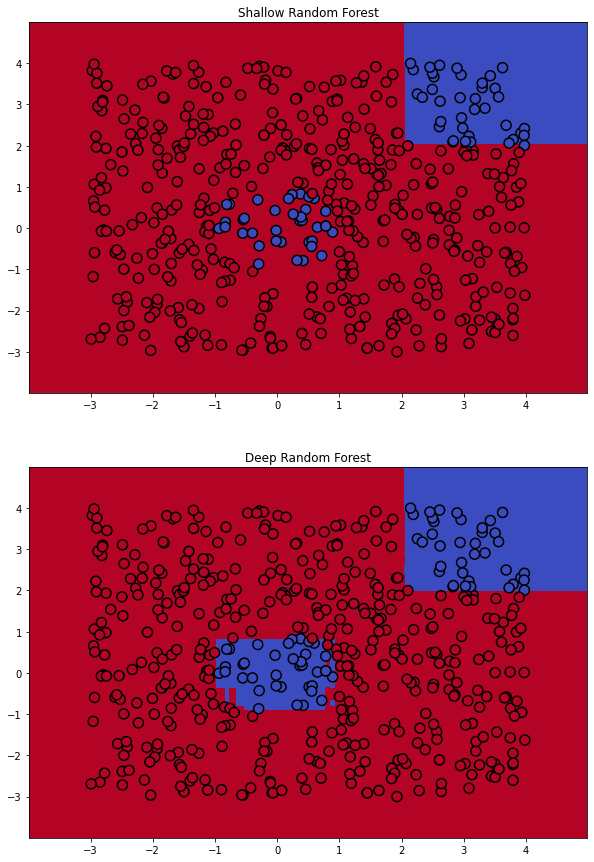

In [2]:
fig, ax = plt.subplots(2, 1, figsize=(10,15))

ax[0].pcolormesh(xx, yy, predicted_shallow, cmap='coolwarm')
ax[0].scatter(train_data[:, 0], train_data[:, 1], c=train_labels, s=100, 
            cmap='coolwarm', edgecolors='black', linewidth=1.5);
ax[0].set_title('Shallow Random Forest')

ax[1].pcolormesh(xx, yy, predicted_deep, cmap='coolwarm')
ax[1].scatter(train_data[:, 0], train_data[:, 1], c=train_labels, s=100, 
            cmap='coolwarm', edgecolors='black', linewidth=1.5);
ax[1].set_title('Deep Random Forest')

In [3]:
import pandas as pd
df = pd.read_csv(
    'https://raw.githubusercontent.com/vincentarelbundock/Rdatasets/master/csv/DAAG/spam7.csv')

In [4]:
df['spam']=df['yesno'].apply(lambda x: 1 if x=='y' else 0)

In [5]:
df=df.drop('yesno',axis=1)
df

,Unnamed: 0,crl.tot,dollar,bang,money,n000,make,spam
0,1,278,0.000,0.778,0.00,0.00,0.00,1
1,2,1028,0.180,0.372,0.43,0.43,0.21,1
2,3,2259,0.184,0.276,0.06,1.16,0.06,1
3,4,191,0.000,0.137,0.00,0.00,0.00,1
4,5,191,0.000,0.135,0.00,0.00,0.00,1
...,...,...,...,...,...,...,...,...
4596,4597,88,0.000,0.000,0.00,0.00,0.31,0
4597,4598,14,0.000,0.353,0.00,0.00,0.00,0
4598,4599,118,0.000,0.000,0.00,0.00,0.30,0
4599,4600,78,0.000,0.000,0.00,0.00,0.96,0


In [6]:
df=df.drop('Unnamed: 0',axis=1)

In [7]:
columns = df.columns.tolist()
columns.remove('spam')
was = []
for col in columns:
    for col1 in columns:
        if col != col1 and col+'_'+col1 not in df.columns and col1 +'_'+col not in df.columns:
            df[col+'_'+col1] = df[col] * df[col1]
df

,crl.tot,dollar,bang,money,n000,make,spam,crl.tot_dollar,crl.tot_bang,crl.tot_money,...,dollar_bang,dollar_money,dollar_n000,dollar_make,bang_money,bang_n000,bang_make,money_n000,money_make,n000_make
0,278,0.000,0.778,0.00,0.00,0.00,1,0.000,216.284,0.00,...,0.000000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.0000,0.0000,0.0000
1,1028,0.180,0.372,0.43,0.43,0.21,1,185.040,382.416,442.04,...,0.066960,0.07740,0.07740,0.03780,0.15996,0.15996,0.07812,0.1849,0.0903,0.0903
2,2259,0.184,0.276,0.06,1.16,0.06,1,415.656,623.484,135.54,...,0.050784,0.01104,0.21344,0.01104,0.01656,0.32016,0.01656,0.0696,0.0036,0.0696
3,191,0.000,0.137,0.00,0.00,0.00,1,0.000,26.167,0.00,...,0.000000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.0000,0.0000,0.0000
4,191,0.000,0.135,0.00,0.00,0.00,1,0.000,25.785,0.00,...,0.000000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.0000,0.0000,0.0000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4596,88,0.000,0.000,0.00,0.00,0.31,0,0.000,0.000,0.00,...,0.000000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.0000,0.0000,0.0000
4597,14,0.000,0.353,0.00,0.00,0.00,0,0.000,4.942,0.00,...,0.000000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.0000,0.0000,0.0000
4598,118,0.000,0.000,0.00,0.00,0.30,0,0.000,0.000,0.00,...,0.000000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.0000,0.0000,0.0000
4599,78,0.000,0.000,0.00,0.00,0.96,0,0.000,0.000,0.00,...,0.000000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.0000,0.0000,0.0000


In [8]:
from sklearn.model_selection import train_test_split

In [9]:
X=df.drop('spam',axis=1).values
Y=df.spam.values

In [10]:
random_seed=42
X_train, X_test, y_train, y_test = train_test_split(
    X, Y, test_size=0.20, random_state=random_seed)

In [11]:
from sklearn.ensemble import GradientBoostingClassifier

In [12]:
GBC = GradientBoostingClassifier(learning_rate=0.1, n_estimators=100, max_depth=3,
                                 min_samples_split=2, min_samples_leaf=1,random_state=random_seed, subsample=1, max_features=None)

In [13]:
GBC.fit(X_train,y_train)

GradientBoostingClassifier(random_state=42, subsample=1)

In [14]:
predict=GBC.predict(X_test)

In [15]:
from sklearn.metrics import accuracy_score
acc=accuracy_score(y_test,predict)
round(acc,3)

0.865

In [16]:
GBC.score(X_test,y_test)

0.8653637350705755

In [17]:
labels=df.columns.tolist()
labels.remove('spam')
pd.Series(GBC.feature_importances_, index=labels
          ).sort_values(ascending=False)

crl.tot_bang      0.614877
dollar            0.140770
dollar_bang       0.060567
bang              0.042572
crl.tot_money     0.040245
crl.tot           0.029716
n000              0.024777
crl.tot_dollar    0.008679
dollar_money      0.007222
crl.tot_make      0.006539
bang_money        0.006469
money             0.006090
dollar_n000       0.003422
bang_make         0.001965
dollar_make       0.001694
crl.tot_n000      0.001366
bang_n000         0.001176
make              0.001166
n000_make         0.000661
money_n000        0.000027
money_make        0.000000
dtype: float64

In [18]:
from sklearn.model_selection import GridSearchCV


# Наш классификатор
GBC = GradientBoostingClassifier(random_state=42)
# Параметры для подбора
param_grid = {'learning_rate': [0.00001, 0.0001, 0.001, 0.01, 0.1, 1],
              'n_estimators': [100, 250, 500, 750, 1000, 1250, 1500, 1750]}
# Подбираем параметры
grid_clf = GridSearchCV(estimator=GBC, param_grid=param_grid,
                        n_jobs=-1, scoring='accuracy', cv=5)
grid_clf.fit(X_train, y_train)
print(f'Best params found: {grid_clf.best_params_ }')
# Оцениваем модель по лучшим параметрам

KeyboardInterrupt: 

In [ ]:
print(f'Model score with best params: {round(grid_clf.best_score_ ,3)}')

In [ ]:
len(grid_clf.cv_results_['params'])

In [ ]:
GBC = GradientBoostingClassifier(learning_rate= 0.01, n_estimators= 1250,random_state=42)
GBC.fit(X_train, y_train)

In [ ]:
grid_clf.cv_results_['params']

In [ ]:
GBC = GradientBoostingClassifier(
    learning_rate=0.01, n_estimators=1250, random_state=42)
# Параметры для подбора
param_grid = {'max_depth': [5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15]}
# Подбираем параметры
grid_clf = GridSearchCV(estimator=GBC, param_grid=param_grid,
                        n_jobs=-1, scoring='accuracy', cv=5)
grid_clf.fit(X_train, y_train)
print(f'Best params found: {grid_clf.best_params_ }')

In [ ]:
def AdaBoost_scratch(X, y, M=10, learning_rate=1):
    # инициалиазция служебных переменных
    N = len(y)
    estimator_list, y_predict_list, estimator_error_list, estimator_weight_list, sample_weight_list = [], [], [], [], []

    # инициализация весов
    sample_weight = np.ones(N) / N
    sample_weight_list.append(sample_weight.copy())

    # цикл по длине М
    for m in range(M):

        # обучим базовую модель и получим предсказание
        estimator = DecisionTreeClassifier(max_depth=1, max_leaf_nodes=2)
        estimator.fit(X, y, sample_weight=sample_weight)
        y_predict = estimator.predict(X)

        # Маска для ошибок классификации
        incorrect = (y_predict != y)

        # Оцениваем ошибку
        stimator_error = np.mean(np.average(
            incorrect, weights=sample_weight, axis=0))
        stimator_error = np.mean( np.average(incorrect, weights=sample_weight, axis=0))
        # Вычисляем вес нового алгоритма
        estimator_weight = learning_rate * \
            np.log((1 - estimator_error) / estimator_error)

        # Получаем новые веса объектов
        sample_weight *= np.exp(estimator_weight * incorrect *
                                ((sample_weight > 0) | (estimator_weight < 0)))

        # Сохраяем результаты данной итерации
        estimator_list.append(estimator)
        y_predict_list.append(y_predict.copy())
        estimator_error_list.append(estimator_error.copy())
        estimator_weight_list.append(estimator_weight.copy())
        sample_weight_list.append(sample_weight.copy())

    # Для удобства переведем в numpy.array
    estimator_list = np.asarray(estimator_list)
    y_predict_list = np.asarray(y_predict_list)
    estimator_error_list = np.asarray(estimator_error_list)
    estimator_weight_list = np.asarray(estimator_weight_list)
    sample_weight_list = np.asarray(sample_weight_list)

    # Получим предсказания
    preds = (np.array([np.sign((y_predict_list[:, point] *
                                estimator_weight_list).sum()) for point in range(N)]))
    print('Accuracy = ', (preds == y).sum() / N)

    return estimator_list, estimator_weight_list, sample_weight_list


estimator_list, estimator_weight_list, sample_weight_list = AdaBoost_scratch(
    X_train, y_train, M=10, learning_rate=0.001)

In [ ]:
def AdaBoost_scratch(X,y, M=10, learning_rate = 1):
    # инициалиазция служебных переменных
    N = len(y)
    estimator_list, y_predict_list, estimator_error_list, estimator_weight_list, sample_weight_list = [], [],[],[],[]
    # инициализация весов
    sample_weight = np.ones(N) / N
    sample_weight_list.append(sample_weight.copy())
    # цикл по длине М
    for m in range(M):   
        # обучим базовую модель и получим предсказание
        estimator = DecisionTreeClassifier(max_depth = 1, max_leaf_nodes=2,random_state=42)
        estimator.fit(X, y, sample_weight=sample_weight)
        y_predict = estimator.predict(X)
        # Маска для ошибок классификации
        incorrect = (y_predict != y)
        # Оцениваем ошибку
        estimator_error = np.mean( np.average(incorrect, weights=sample_weight, axis=0))
        # Вычисляем вес нового алгоритма
        estimator_weight =  learning_rate * np.log((1 - estimator_error) / estimator_error)
        # Получаем новые веса объектов
        sample_weight *= np.exp(estimator_weight * incorrect * ((sample_weight > 0) | (estimator_weight < 0)))
        # Сохраяем результаты данной итерации
        estimator_list.append(estimator)
        y_predict_list.append(y_predict.copy())
        estimator_error_list.append(estimator_error.copy())
        estimator_weight_list.append(estimator_weight.copy())
        sample_weight_list.append(sample_weight.copy())
    # Для удобства переведем в numpy.array   
    estimator_list = np.asarray(estimator_list)
    y_predict_list = np.asarray(y_predict_list)
    estimator_error_list = np.asarray(estimator_error_list)
    estimator_weight_list = np.asarray(estimator_weight_list)
    sample_weight_list = np.asarray(sample_weight_list)
    # Получим предсказания
    preds = (np.array([np.sign((y_predict_list[:,point] * estimator_weight_list).sum()) for point in range(N)]))
    print('Accuracy = ', (preds == y).sum() / N) 
    return estimator_list, estimator_weight_list, sample_weight_list

estimator_list, estimator_weight_list, sample_weight_list = AdaBoost_scratch(
    X_train, y_train, M=10, learning_rate=0.001)

In [ ]:
def AdaBoost_scratch(X, y, M = 10, learning_rate = 1):
    # инициалиазция служебных переменных
    target_length = len(y)
    estimator_list = []
    y_predict_list = []
    estimator_error_list = []
    estimator_weight_list = []
    sample_weight_list = []
    # инициализация весов
    sample_weight = np.ones(target_length) / target_length
    sample_weight_list.append(sample_weight.copy())
    # цикл по длине М
    for m in range(M):   
        # обучим базовую модель и получим предсказание
        estimator = DecisionTreeClassifier(max_depth = 1, max_leaf_nodes = 2)
        estimator.fit(X, y, sample_weight = sample_weight)
        y_predict = estimator.predict(X)
        # Маска для ошибок классификации
        incorrect = (y_predict != y)
        # Оцениваем ошибку
        estimator_error = np.mean( np.average(incorrect, weights=sample_weight, axis=0))
        # Вычисляем вес нового алгоритма
        estimator_weight = 0.5*np.log(1-estimator_error/estimator_error)
        # Получаем новые веса объектов
        estimator_weight =  learning_rate * np.log((1 - estimator_error) / estimator_error)
        # Сохраяем результаты данной итерации
        estimator_list.append(estimator)
        y_predict_list.append(y_predict.copy())
        estimator_error_list.append(estimator_error.copy())
        estimator_weight_list.append(estimator_weight.copy())
        sample_weight_list.append(sample_weight.copy())
    # Для удобства переведем в numpy.array   
    estimator_list = np.asarray(estimator_list)
    y_predict_list = np.asarray(y_predict_list)
    estimator_error_list = np.asarray(estimator_error_list)
    estimator_weight_list = np.asarray(estimator_weight_list)
    sample_weight_list = np.asarray(sample_weight_list)
    # Получим предсказания
    preds = (np.array([np.sign((y_predict_list[:,point] * estimator_weight_list).sum()) for point in range(target_length)]))
    print('Accuracy = ', (preds == y).sum() / target_length) 
    return estimator_list, estimator_weight_list, sample_weight_list

estimator_list, estimator_weight_list, sample_weight_list = AdaBoost_scratch(
    X_train, y_train, M=10, learning_rate=0.001)

In [ ]:
def AdaBoost_scratch(X,y, M=10, learning_rate = 1):
    # инициалиазция служебных переменных
    N = len(y)
    estimator_list, y_predict_list, estimator_error_list, estimator_weight_list, sample_weight_list = [], [],[],[],[]
    # инициализация весов
    sample_weight = np.ones(N) / N
    sample_weight_list.append(sample_weight.copy())
    # цикл по длине М
    for m in range(M):   
        # обучим базовую модель и получим предсказание
        estimator = DecisionTreeClassifier(max_depth = 1, max_leaf_nodes=2)
        estimator.fit(X, y, sample_weight=sample_weight)
        y_predict = estimator.predict(X)
        # Маска для ошибок классификации
        incorrect = (y_predict != y)
        # Оцениваем ошибку
        estimator_error = np.mean( np.average(incorrect, weights=sample_weight, axis=0))
        # Вычисляем вес нового алгоритма
        estimator_weight =  learning_rate * np.log((1 - estimator_error) / estimator_error)
        # Получаем новые веса объектов
        sample_weight *= np.exp(estimator_weight * incorrect * ((sample_weight > 0) | (estimator_weight < 0)))
        # Сохраяем результаты данной итерации
        estimator_list.append(estimator)
        y_predict_list.append(y_predict.copy())
        estimator_error_list.append(estimator_error.copy())
        estimator_weight_list.append(estimator_weight.copy())
        sample_weight_list.append(sample_weight.copy())
    # Для удобства переведем в numpy.array   
    estimator_list = np.asarray(estimator_list)
    y_predict_list = np.asarray(y_predict_list)
    estimator_error_list = np.asarray(estimator_error_list)
    estimator_weight_list = np.asarray(estimator_weight_list)
    sample_weight_list = np.asarray(sample_weight_list)
    # Получим предсказания
    preds = (np.array([np.sign((y_predict_list[:,point] * estimator_weight_list).sum()) for point in range(N)]))
    print('Accuracy = ', (preds == y).sum() / N) 
    return estimator_list, estimator_weight_list, sample_weight_list

estimator_list, estimator_weight_list, sample_weight_list = AdaBoost_scratch(
    X, Y, M=10, learning_rate=0.001)

In [19]:
def AdaBoost_scratch(X,y, M=10, learning_rate = 1):
    # инициалиазция служебных переменных
    N = len(y)
    estimator_list, y_predict_list, estimator_error_list, estimator_weight_list, sample_weight_list = [], [],[],[],[]
    # инициализация весов
    sample_weight = np.ones(N) / N
    sample_weight_list.append(sample_weight.copy())
    # цикл по длине М
    for m in range(M):   
        # обучим базовую модель и получим предсказание
        estimator = DecisionTreeClassifier(max_depth = 1, max_leaf_nodes=2)
        estimator.fit(X, y, sample_weight=sample_weight)
        y_predict = estimator.predict(X)
        # Маска для ошибок классификации
        incorrect = (y_predict != y)
        # Оцениваем ошибку
        estimator_error = np.mean( np.average(incorrect, weights=sample_weight, axis=0))
        # Вычисляем вес нового алгоритма
        estimator_weight =  learning_rate * np.log((1 - estimator_error) / estimator_error)
        # Получаем новые веса объектов
        sample_weight *= np.exp(estimator_weight * incorrect * ((sample_weight > 0) | (estimator_weight < 0)))
        # Сохраяем результаты данной итерации
        estimator_list.append(estimator)
        y_predict_list.append(y_predict.copy())
        estimator_error_list.append(estimator_error.copy())
        estimator_weight_list.append(estimator_weight.copy())
        sample_weight_list.append(sample_weight.copy())
    # Для удобства переведем в numpy.array   
    estimator_list = np.asarray(estimator_list)
    y_predict_list = np.asarray(y_predict_list)
    estimator_error_list = np.asarray(estimator_error_list)
    estimator_weight_list = np.asarray(estimator_weight_list)
    sample_weight_list = np.asarray(sample_weight_list)
    # Получим предсказания
    preds = (np.array([np.sign((y_predict_list[:,point] * estimator_weight_list).sum()) for point in range(N)]))
    print('Accuracy = ', (preds == y).sum() / N) 
    return estimator_list, estimator_weight_list, sample_weight_list

estimator_list, estimator_weight_list, sample_weight_list = AdaBoost_scratch(
    X, Y, M=10, learning_rate=0.001)

Accuracy =  0.8228645946533363
